In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('Campus Recruitment.csv')

df.head()


,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,5400000.0
1,2,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4000000.0
2,3,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,5000000.0
3,4,M,56.00,Negeri,52.00,Swasta,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Negeri,73.60,Negeri,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,8500000.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                215 non-null    int64  
 1   Jenis Kelamin                     214 non-null    object 
 2   Nilai rata-rata SMP               213 non-null    float64
 3   Lembaga pendidikan kelas 10       215 non-null    object 
 4   Nilai rata-rata SMA               214 non-null    float64
 5   Lembaga pendidikan kelas 12       215 non-null    object 
 6   Jurusan saat SMA                  215 non-null    object 
 7   IPK                               215 non-null    float64
 8   Program studi sarjana             215 non-null    object 
 9   Pengalaman kerja sebelum lulus    215 non-null    object 
 10  Nilai tes kemampuan kerja         209 non-null    float64
 11  Pendidikan pascasarjana           215 non-null    object 
 12  Nilai ra

In [5]:
df.describe()


,ID,Nilai rata-rata SMP,Nilai rata-rata SMA,IPK,Nilai tes kemampuan kerja,Nilai rata-rata pascasarjana,Gaji
count,215.000000,213.000000,214.000000,215.000000,209.000000,215.000000,1.480000e+02
mean,108.000000,67.273380,66.330047,66.370186,72.114115,62.278186,5.773108e+06
std,62.209324,10.842297,10.922964,7.358743,13.351612,5.833385,1.869149e+06
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,4.000000e+06
25%,54.500000,60.400000,60.850000,61.000000,60.000000,57.945000,4.800000e+06
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,5.300000e+06
75%,161.500000,75.400000,73.000000,72.000000,84.000000,66.255000,6.000000e+06
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,1.880000e+07


In [6]:
df.isnull().sum()


,0
ID,0
Jenis Kelamin,1
Nilai rata-rata SMP,2
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,1
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


In [7]:
# Hapus ID jika ada
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)

# Hapus Gaji (menghindari data leakage)
if 'Gaji' in df.columns:
    df = df.drop('Gaji', axis=1)

# Isi missing numerik dengan median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Isi missing kategorikal dengan modus
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()


/tmp/ipython-input-3582847342.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3582847342.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
Jenis Kelamin,0
Nilai rata-rata SMP,0
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,0
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0
Nilai tes kemampuan kerja,0


In [8]:
df = pd.get_dummies(df, drop_first=True)

df.head()


,Nilai rata-rata SMP,Nilai rata-rata SMA,IPK,Nilai tes kemampuan kerja,Nilai rata-rata pascasarjana,Jenis Kelamin_Female,Jenis Kelamin_M,Jenis Kelamin_Male,Lembaga pendidikan kelas 10_Negeri,Lembaga pendidikan kelas 10_Swasta,Lembaga pendidikan kelas 12_Negeri,Lembaga pendidikan kelas 12_Swasta,Jurusan saat SMA_Commerce,Jurusan saat SMA_Science,Program studi sarjana_Others,Program studi sarjana_Sci&Tech,Pengalaman kerja sebelum lulus_Yes,Pendidikan pascasarjana_Mkt&HR,status kelulusan (Bekerja/Belum)_Placed
0,67.00,91.00,58.00,55.0,58.80,False,True,False,False,False,False,False,True,False,False,True,False,True,True
1,79.33,78.33,77.48,86.5,66.28,False,True,False,True,False,True,False,False,True,False,True,True,False,True
2,65.00,68.00,64.00,75.0,57.80,False,True,False,True,False,False,True,False,False,False,False,False,False,True
3,56.00,52.00,52.00,66.0,59.43,False,True,False,True,False,False,True,False,True,False,True,False,True,False
4,85.80,73.60,73.30,96.8,55.50,False,True,False,True,False,True,False,True,False,False,False,False,False,True


In [10]:
target_column = 'status kelulusan (Bekerja/Belum)_Placed'  # Corrected target column name

X = df.drop(target_column, axis=1)
y = df[target_column]

In [11]:
df.columns


Index(['Nilai rata-rata SMP', 'Nilai rata-rata SMA', 'IPK',
       'Nilai tes kemampuan kerja', 'Nilai rata-rata pascasarjana',
       'Jenis Kelamin_Female', 'Jenis Kelamin_M', 'Jenis Kelamin_Male',
       'Lembaga pendidikan kelas 10_Negeri',
       'Lembaga pendidikan kelas 10_Swasta',
       'Lembaga pendidikan kelas 12_Negeri',
       'Lembaga pendidikan kelas 12_Swasta', 'Jurusan saat SMA_Commerce',
       'Jurusan saat SMA_Science', 'Program studi sarjana_Others',
       'Program studi sarjana_Sci&Tech', 'Pengalaman kerja sebelum lulus_Yes',
       'Pendidikan pascasarjana_Mkt&HR',
       'status kelulusan (Bekerja/Belum)_Placed'],
      dtype='object')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

       False       0.87      1.00      0.93        13
        True       1.00      0.93      0.97        30

    accuracy                           0.95        43
   macro avg       0.93      0.97      0.95        43
weighted avg       0.96      0.95      0.95        43



In [15]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.6744186046511628
              precision    recall  f1-score   support

       False       0.45      0.38      0.42        13
        True       0.75      0.80      0.77        30

    accuracy                           0.67        43
   macro avg       0.60      0.59      0.60        43
weighted avg       0.66      0.67      0.67        43



In [16]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9069767441860465
              precision    recall  f1-score   support

       False       0.91      0.77      0.83        13
        True       0.91      0.97      0.94        30

    accuracy                           0.91        43
   macro avg       0.91      0.87      0.88        43
weighted avg       0.91      0.91      0.90        43



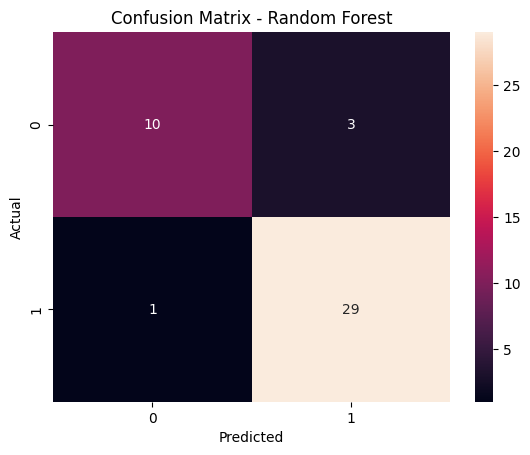

In [17]:
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_cm(y_test, y_pred_rf, "Confusion Matrix - Random Forest")


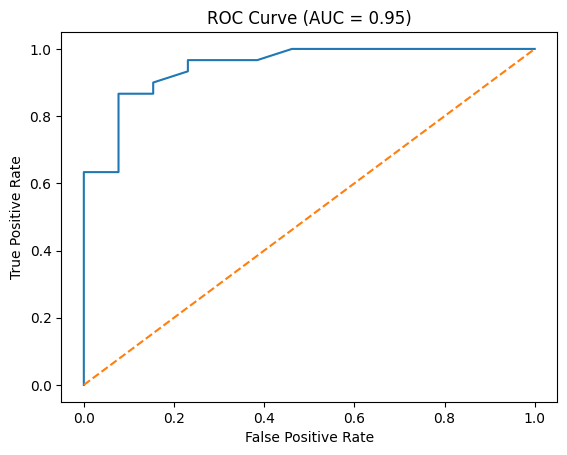

In [18]:
y_prob = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.title(f'ROC Curve (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


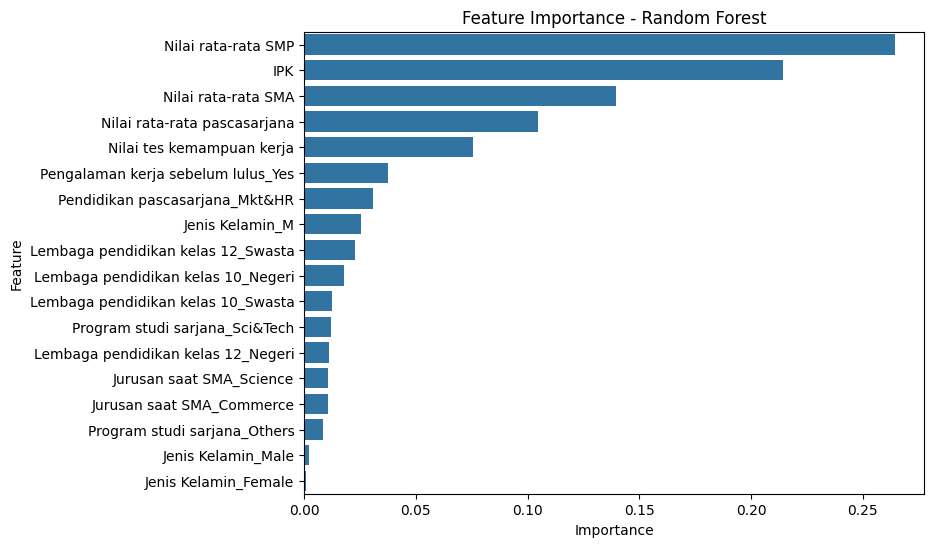

,Feature,Importance
0,Nilai rata-rata SMP,0.264180
2,IPK,0.214022
1,Nilai rata-rata SMA,0.139452
4,Nilai rata-rata pascasarjana,0.104408
3,Nilai tes kemampuan kerja,0.075666
16,Pengalaman kerja sebelum lulus_Yes,0.037294
17,Pendidikan pascasarjana_Mkt&HR,0.030620
6,Jenis Kelamin_M,0.025538
11,Lembaga pendidikan kelas 12_Swasta,0.022735
8,Lembaga pendidikan kelas 10_Negeri,0.017861


In [19]:
importances = rf_model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance - Random Forest")
plt.show()

feature_importance


In [20]:
print("=== PERBANDINGAN AKURASI ===")
print("Logistic Regression :", accuracy_score(y_test, y_pred_log))
print("Decision Tree       :", accuracy_score(y_test, y_pred_dt))
print("Random Forest       :", accuracy_score(y_test, y_pred_rf))


=== PERBANDINGAN AKURASI ===
Logistic Regression : 0.9534883720930233
Decision Tree       : 0.6744186046511628
Random Forest       : 0.9069767441860465
